<a href="https://colab.research.google.com/github/Prisci723/InteligenciaArtificial1/blob/main/1er%20Parcial/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamiento del dataset

El siguiente dataset trata sobre las lecturas de un Conjunto de datos de mantenimiento de ultrafiltración con revestimiento electrónico

In [43]:
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
dataframe = pd.read_csv("/content/gdrive/MyDrive/manual_30min_norm.csv", sep=",")
print(dataframe)

                    TIME       FM1       PE1       PE2       PE3       PE4  \
0       16/09/2013 00:00  1.000000  0.538462  0.538462  0.123077  0.123077   
1       16/09/2013 00:30  0.999475  0.538416  0.538416  0.123077  0.122985   
2       16/09/2013 01:00  0.998950  0.538370  0.538370  0.123077  0.122894   
3       16/09/2013 01:30  0.998424  0.538324  0.538324  0.123077  0.122802   
4       16/09/2013 02:00  0.997899  0.538278  0.538278  0.123077  0.122711   
...                  ...       ...       ...       ...       ...       ...   
110636  07/01/2020 22:00  0.235294  0.492308  0.553846  0.523077  0.400000   
110637  07/01/2020 22:30  0.235294  0.492308  0.553846  0.523077  0.400000   
110638  07/01/2020 23:00  0.235294  0.492308  0.553846  0.523077  0.400000   
110639  07/01/2020 23:30  0.235294  0.492308  0.553846  0.523077  0.400000   
110640  08/01/2020 00:00  0.235294  0.492308  0.553846  0.523077  0.400000   

             TP1       EPOCH  
0       0.142857  1379289600  
1

Para verificar si hay valores nulos:

In [45]:
print(dataframe.isnull().any())

TIME     False
FM1      False
PE1      False
PE2      False
PE3      False
PE4      False
TP1      False
EPOCH    False
dtype: bool


In [46]:
columnas_numericas = dataframe.columns[1:]

# Verificar si hay valores no numéricos en las columnas excepto la fecha
non_numeric_columns = dataframe[columnas_numericas].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()
print("Valores no numéricos en las columnas:")
print(non_numeric_columns)

Valores no numéricos en las columnas:
FM1      False
PE1      False
PE2      False
PE3      False
PE4      False
TP1      False
EPOCH    False
dtype: bool


Las columnas corresponden a:

Es por lo que se ha decidido que la variable objetivo a predecir en el siguiente dataset es Flow Meter Reading, registrada en el dataset como FM1, lo que significa lectura del medidor de flujo

También analizando los datos vemos que no existe valores nulos o valores que sean caracteres que requieren la conversion a números, pero si analizamos que existe el tiempo como date y epoch, que en realidad son lo mismo, ya que epoch se refiere a la propia fecha convertida a unix time, lo cual permite ser procesada como un entero, por lo que la fecha será omitida

In [47]:
del dataframe['TIME']

In [48]:
dataframe.to_csv('Ecoating_ultrafiltration_clean.csv', index=False)

In [50]:
import os
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

Se toma en cuenta el 80% para el entrenamiento, es decir que hasta 88513 se entrenará y el resto será para la prueba

In [135]:
data = np.loadtxt("/content/gdrive/MyDrive/Ecoating_ultrafiltration_clean.csv", delimiter=',')
y = data[:, 0]  # Primera columna
X = data[:, 1:]  # Resto de las columnas
# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, y_train = X[:88513], y[:88513]
# X_test, y_test = X[88513:], y[88513:]
X_train, y_train = X[:813], y[:813]
X_test, y_test = X[813:], y[813:]

X = X_train
y = y_train
print(X)
print(y)

[[5.38461500e-01 5.38461500e-01 1.23076916e-01 1.23076916e-01
  1.42857200e-01 1.37928960e+09]
 [5.38415730e-01 5.38415730e-01 1.23076916e-01 1.22985350e-01
  1.43787190e-01 1.37929140e+09]
 [5.38369950e-01 5.38369950e-01 1.23076916e-01 1.22893770e-01
  1.44717370e-01 1.37929320e+09]
 ...
 [5.23076900e-01 5.23076900e-01 1.47307700e-01 8.11538300e-02
  6.32366000e-01 1.38074760e+09]
 [5.23076900e-01 5.23076900e-01 1.47371800e-01 8.09615400e-02
  6.33519600e-01 1.38074940e+09]
 [5.23076900e-01 5.23076900e-01 1.47435890e-01 8.07692260e-02
  6.34672900e-01 1.38075120e+09]]
[1.         0.99947476 0.9989496  0.99842435 0.9978992  0.99737394
 0.99684876 0.9963235  0.9957983  0.9952731  0.9947479  0.9942227
 0.99369746 0.99317235 0.99264705 0.9921218  0.99159664 0.9910714
 0.9905462  0.990021   0.9894959  0.9889706  0.98844534 0.98792017
 0.9873949  0.98686975 0.9863445  0.9858194  0.9852941  0.98476887
 0.9842437  0.98371845 0.98319334 0.98266804 0.9821429  0.9816176
 0.9810924  0.9805672  0.

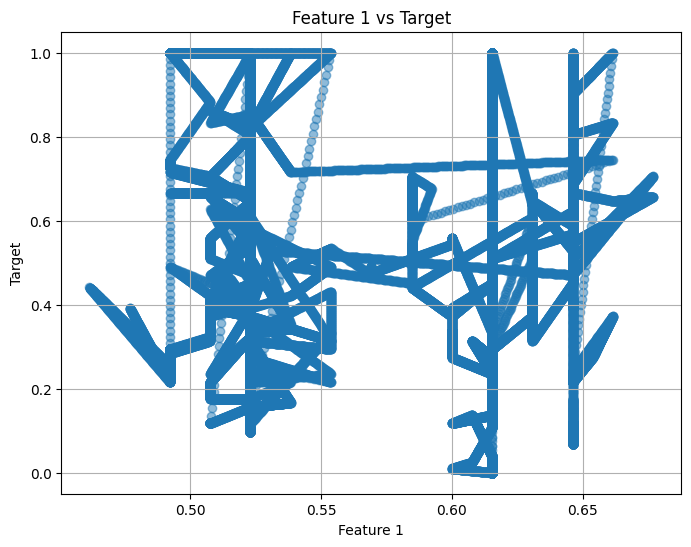

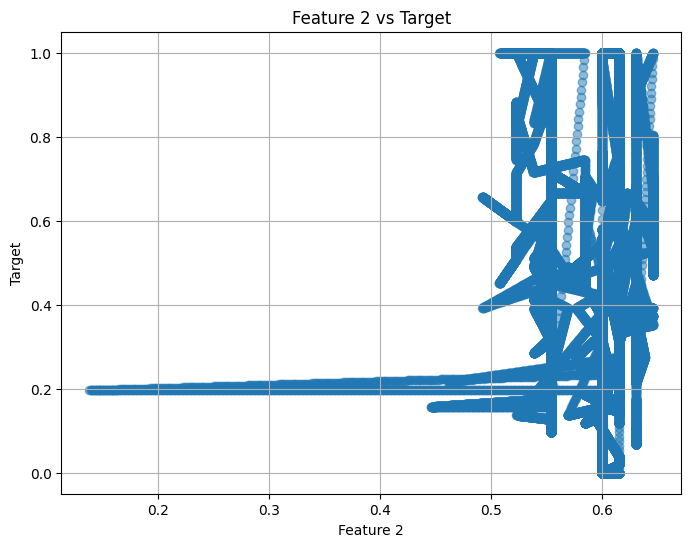

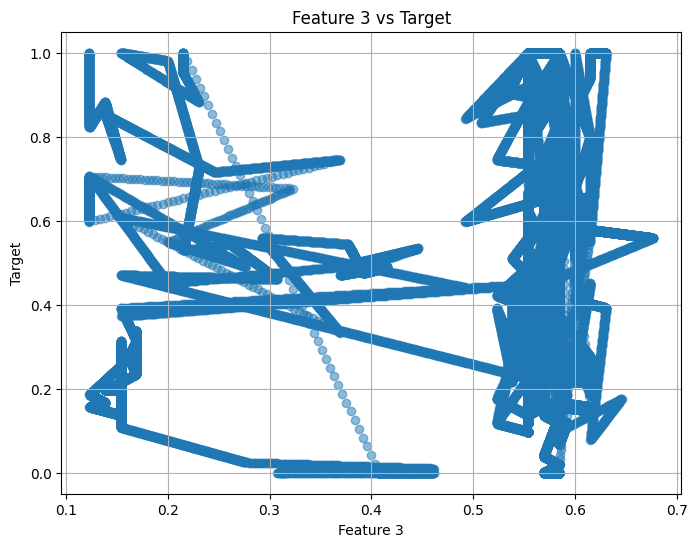

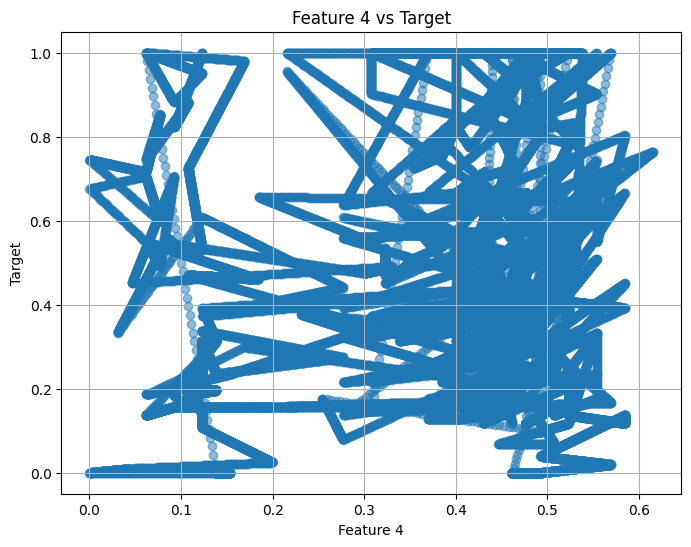

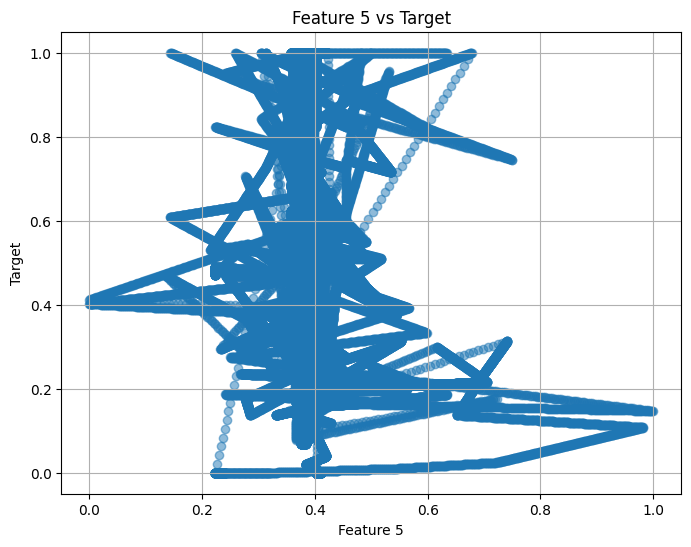

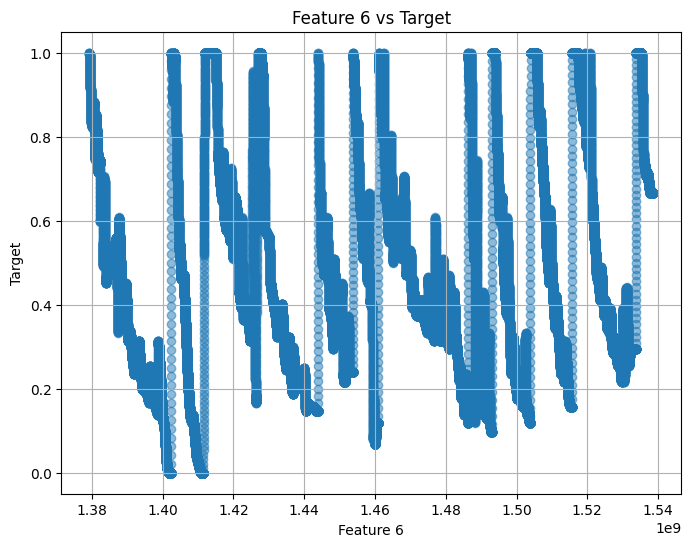

In [61]:
# Obtén el número de características (número de columnas en X)
num_features = X.shape[1]

# Itera sobre cada característica y crea un gráfico para visualizar su relación con el target
for i in range(num_features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f'Feature {i+1} vs Target')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.grid(True)
    plt.show()

In [120]:
 X = np.concatenate([X, X * X], axis=1)

In [130]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [131]:
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[5.38461500e-01 5.38461500e-01 1.23076916e-01 1.23076916e-01
  1.42857200e-01 1.37928960e+09]
 [5.38415730e-01 5.38415730e-01 1.23076916e-01 1.22985350e-01
  1.43787190e-01 1.37929140e+09]
 [5.38369950e-01 5.38369950e-01 1.23076916e-01 1.22893770e-01
  1.44717370e-01 1.37929320e+09]
 ...
 [5.07692300e-01 5.53846200e-01 5.84615350e-01 4.76923100e-01
  3.90848300e-01 1.53860760e+09]
 [5.07692300e-01 5.53846200e-01 5.84615350e-01 4.76923100e-01
  3.90960000e-01 1.53860940e+09]
 [5.07692300e-01 5.53846200e-01 5.84615350e-01 4.76923100e-01
  3.91071380e-01 1.53861120e+09]]
Media calculada: [5.74334049e-01 5.90661523e-01 5.13778852e-01 3.93090881e-01
 3.96874334e-01 1.45895040e+09]
Desviación estandar calculada: [5.34763679e-02 4.13476537e-02 1.38222129e-01 1.37313913e-01
 8.68756658e-02 4.59927039e+07]
[[-0.67081124 -1.26246638 -2.82662363 -1.96639918 -2.92391582 -1.73203124]
 [-0.67166713 -1.26357334 -2.82662363 -1.96706601 -2.91321099 -1.7319921 ]
 [-0.67252321 -1.26468053 -2.82662363 -1

In [136]:
m = X.shape[0]
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [141]:
print(X.shape)

(813, 7)


In [125]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(h - y))

    return J

In [126]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

<ipython-input-125-10dbca19759c>:8: RuntimeWarning: overflow encountered in square
  J = (1/(2 * m)) * np.sum(np.square(h - y))
<ipython-input-126-46c5f85fd5a0>:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)


theta calculado por el descenso por el gradiente: [nan nan nan nan nan nan nan]


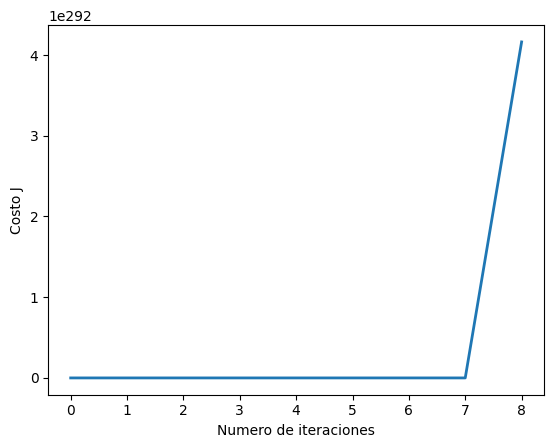

In [140]:
alpha = 0.01
num_iters = 5000
X_rounded = np.round(X, decimals=2)
Y_rounded = np.round(y, decimals=2)

theta = np.zeros(7)
theta, J_history = gradientDescentMulti(X_rounded, Y_rounded , theta, alpha, num_iters)


pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))